<h1>Thêm thư viện</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

<h1> Đọc dữ liệu </h1>

In [4]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<h1>Kiểm tra dữ liệu </h1>

In [7]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<h2>Xử lý các dữ liệu bất thường </h2>

In [9]:
df[df["resting bp s"]==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [10]:
df.drop(index=450,inplace=True)

In [11]:
df[df["cholesterol"]==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
294,65,1,4,115,0,0,0,93,1,0.0,2,1
295,32,1,1,95,0,1,0,127,0,0.7,1,1
296,61,1,4,105,0,1,0,110,1,1.5,1,1
297,50,1,4,145,0,1,0,139,1,0.7,2,1
298,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1,1
516,63,1,3,130,0,1,1,160,0,3.0,2,0
519,48,1,3,102,0,1,1,110,1,1.0,3,1
536,56,1,4,130,0,0,2,122,1,1.0,2,1


In [12]:
#số lượng bệnh nhân có cholesterol = 0

<Axes: xlabel='cholesterol', ylabel='count'>

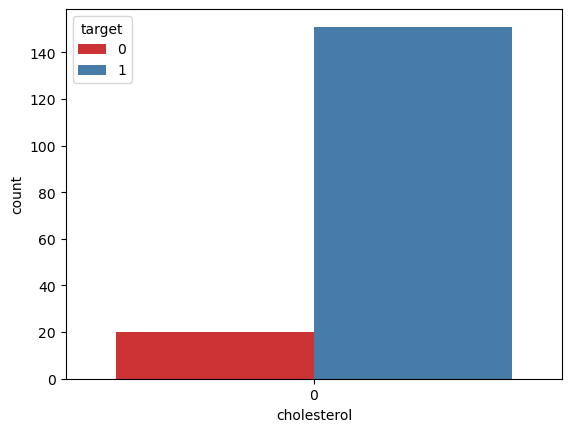

In [13]:
sns.countplot(x='cholesterol', hue='target', data=df[df["cholesterol"]==0], palette='Set1')

<h2>kiểm tra dữ liệu bị trùng </h2>

In [15]:
dup =df[df.duplicated(keep=False)]
dup

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [16]:
#kiểm tra lại dữ liệu

In [17]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.719092,0.763667,3.232969,132.264929,210.540791,0.213625,0.698907,139.719933,0.387721,0.922288,1.624054,0.528175
std,9.362067,0.425008,0.935850,17.971769,101.279280,0.410037,0.870489,25.524527,0.487435,1.086665,0.610619,0.499416
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [18]:
data = df.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   int64  
 1   sex                  1189 non-null   int64  
 2   chest pain type      1189 non-null   int64  
 3   resting bp s         1189 non-null   int64  
 4   cholesterol          1189 non-null   int64  
 5   fasting blood sugar  1189 non-null   int64  
 6   resting ecg          1189 non-null   int64  
 7   max heart rate       1189 non-null   int64  
 8   exercise angina      1189 non-null   int64  
 9   oldpeak              1189 non-null   float64
 10  ST slope             1189 non-null   int64  
 11  target               1189 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 120.8 KB


Text(0.5, 1.0, '')

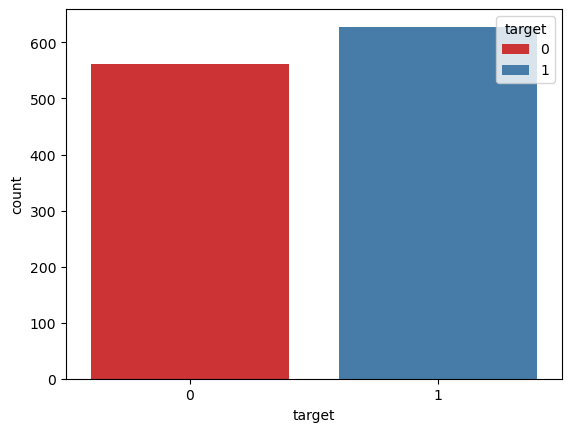

In [20]:
sns.countplot(x='target', hue='target', data=df, palette='Set1').set_title('')

<h2> Sự phân phối dữ liêu của các biến rời rạc </h2>

Text(0.5, 1.0, 'Distribution of age')

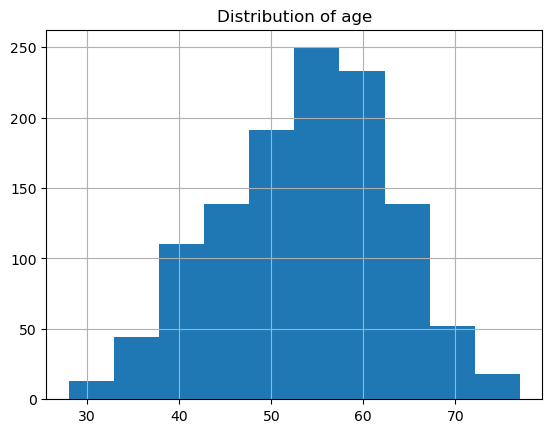

In [22]:
df["age"].hist().plot(kind="bar")
plt.title("Distribution of age")

Text(0.5, 1.0, 'Distribution of resting bp s')

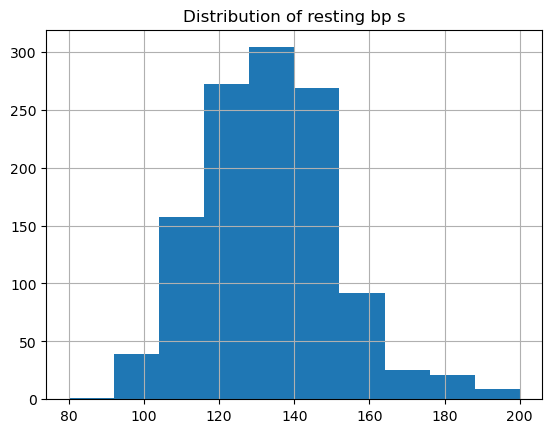

In [23]:
df["resting bp s"].hist().plot(kind="bar")
plt.title("Distribution of resting bp s")

Text(0.5, 1.0, 'Distribution of max heart rate')

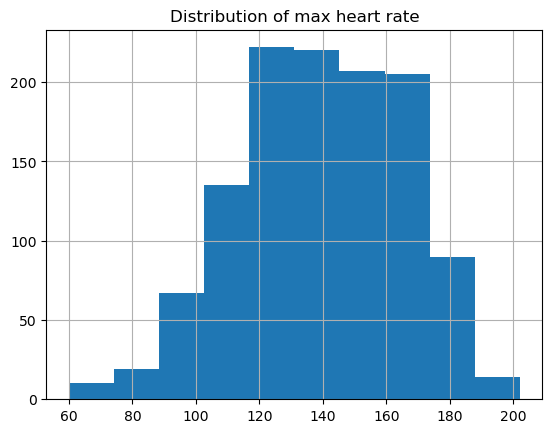

In [24]:
df["max heart rate"].hist().plot(kind="bar")
plt.title("Distribution of max heart rate")

Text(0.5, 1.0, 'Distribution of cholesterol')

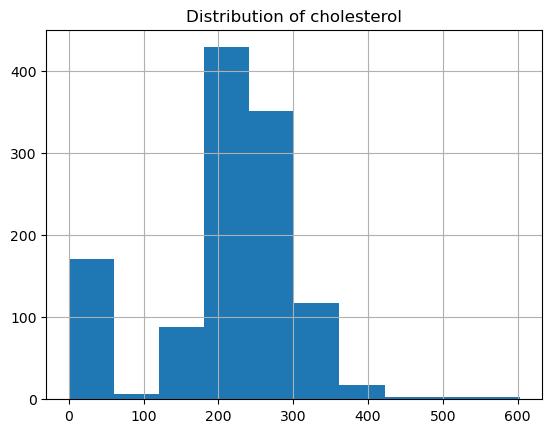

In [25]:
df["cholesterol"].hist().plot(kind="bar")
plt.title("Distribution of cholesterol")

Text(0.5, 1.0, 'Distribution of oldpeak')

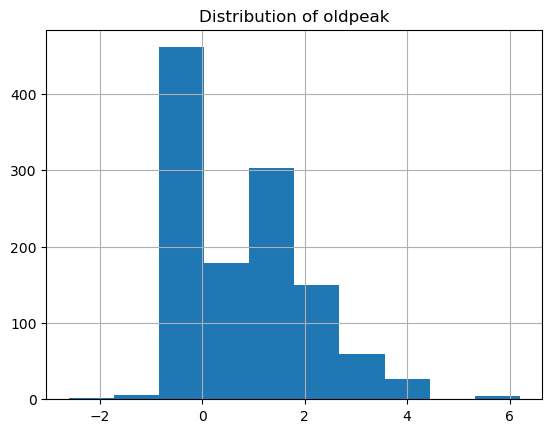

In [26]:
df["oldpeak"].hist().plot(kind="bar")
plt.title("Distribution of oldpeak")

In [27]:
#Thống kê số lượng người mắc bệnh tim theo giá trị của các biến rời rạc (giới tính, các triệu chứng đau ngực, đau thắt ngực do vận động,  

<Axes: xlabel='sex', ylabel='count'>

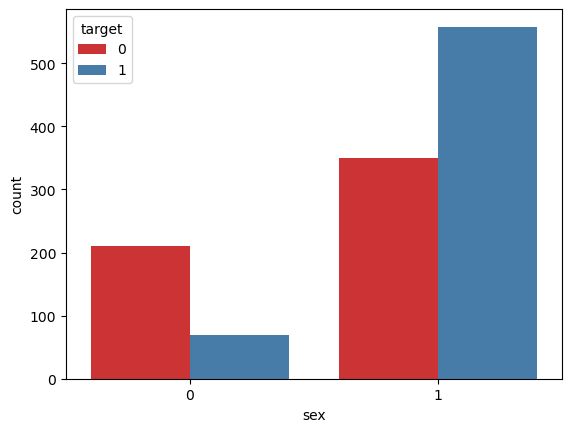

In [28]:
sns.countplot(x='sex', hue='target', data=df, palette='Set1')

<Axes: xlabel='chest pain type', ylabel='count'>

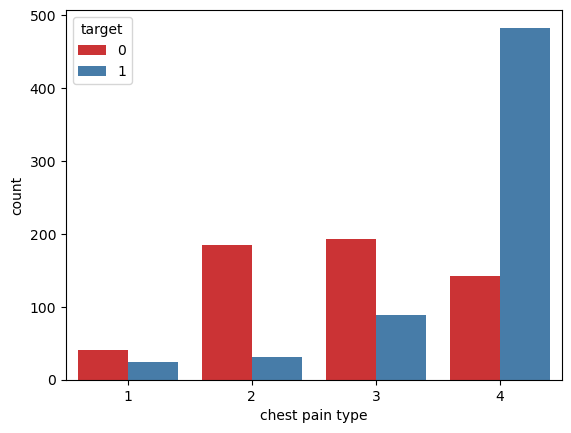

In [29]:
sns.countplot(x='chest pain type', hue='target', data=df, palette='Set1')

<Axes: xlabel='exercise angina', ylabel='count'>

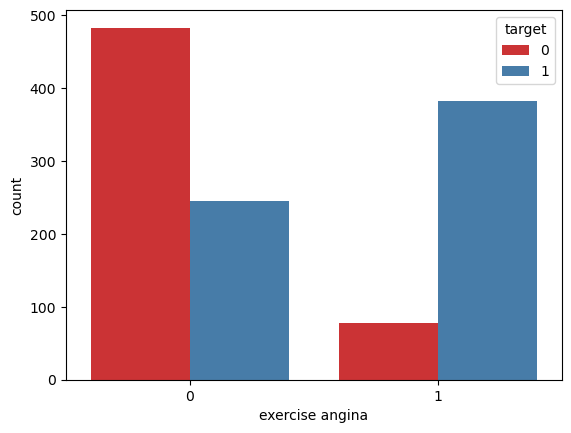

In [30]:
sns.countplot(x='exercise angina', hue='target', data=df, palette='Set1')

<Axes: xlabel='resting ecg', ylabel='count'>

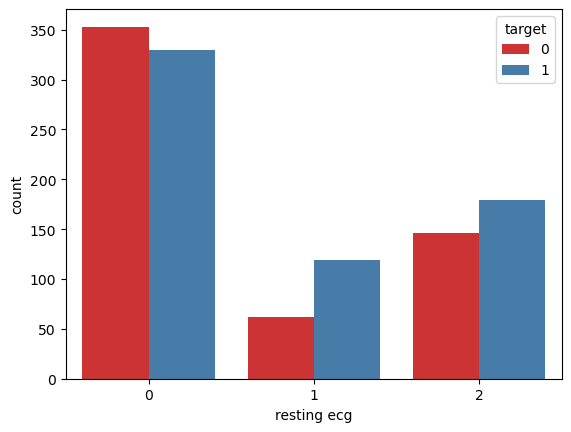

In [31]:
sns.countplot(x='resting ecg', hue='target', data=df, palette='Set1')

<Axes: xlabel='ST slope', ylabel='count'>

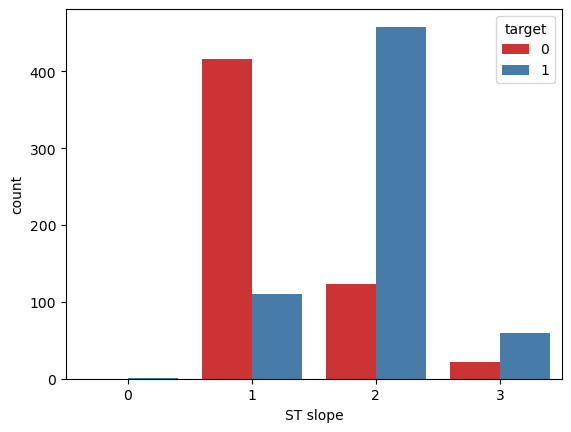

In [32]:
sns.countplot(x='ST slope', hue='target', data=df, palette='Set1')

<Axes: xlabel='fasting blood sugar', ylabel='count'>

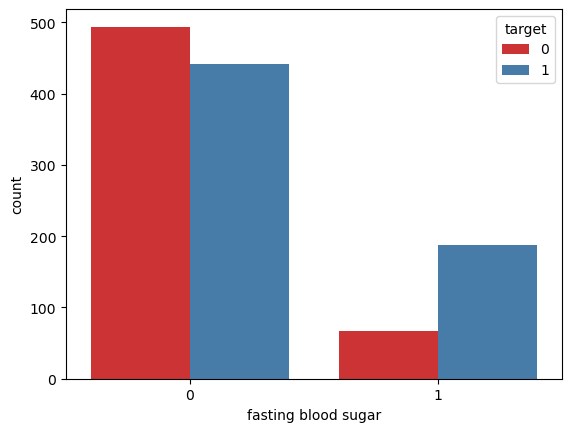

In [33]:
sns.countplot(x='fasting blood sugar', hue='target', data=df, palette='Set1')

<h1> Phân tích bộ dữ liệu </h1>

<h3> Phân tích sự tương quan giữa các biến </h3>

In [35]:
#Ma trận tương quan giữa các biến
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015034,0.149089,0.264345,-0.046318,0.179005,0.194742,-0.368803,0.188238,0.245063,0.237718,0.262020
sex,0.015034,1.000000,0.138543,-0.003147,-0.207874,0.111232,-0.021859,-0.182168,0.194829,0.096165,0.127662,0.310982
chest pain type,0.149089,0.138543,1.000000,0.008139,-0.110033,0.076393,0.035547,-0.337425,0.403379,0.224250,0.277129,0.460509
resting bp s,0.264345,-0.003147,0.008139,1.000000,0.088585,0.087008,0.093076,-0.099950,0.140758,0.183389,0.095223,0.130044
cholesterol,-0.046318,-0.207874,-0.110033,0.088585,1.000000,-0.241152,0.149790,0.239542,-0.034721,0.058492,-0.099174,-0.197149
fasting blood sugar,0.179005,0.111232,0.076393,0.087008,-0.241152,1.000000,0.031784,-0.118458,0.052724,0.031433,0.146212,0.217215
resting ecg,0.194742,-0.021859,0.035547,0.093076,0.149790,0.031784,1.000000,0.059241,0.037304,0.126431,0.094085,0.073745
max heart rate,-0.368803,-0.182168,-0.337425,-0.099950,0.239542,-0.118458,0.059241,1.000000,-0.377448,-0.184005,-0.351168,-0.413971
exercise angina,0.188238,0.194829,0.403379,0.140758,-0.034721,0.052724,0.037304,-0.377448,1.000000,0.371271,0.393987,0.482407
oldpeak,0.245063,0.096165,0.224250,0.183389,0.058492,0.031433,0.126431,-0.184005,0.371271,1.000000,0.524510,0.398160


C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.3% of the points

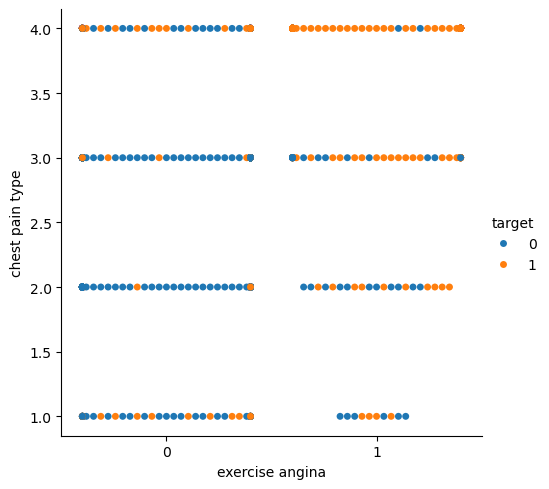

In [36]:
sns.catplot(x="exercise angina", y="chest pain type", hue="target", kind="swarm", data=df)

C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.6% of the points

C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


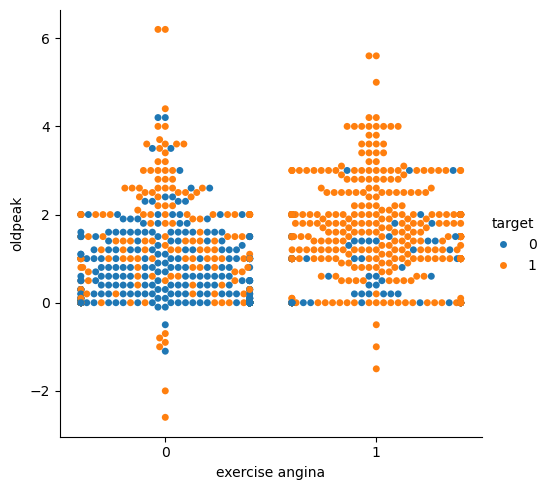

In [37]:
sns.catplot(x="exercise angina", y="oldpeak", hue="target", kind="swarm", data=df)

C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 96.2% of the points

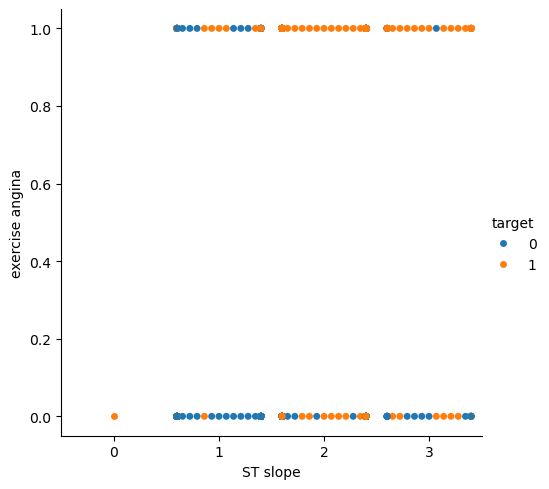

In [38]:
sns.catplot(x="ST slope", y="exercise angina", hue="target", kind="swarm", data=df)

C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.4% of the points

C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danny\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


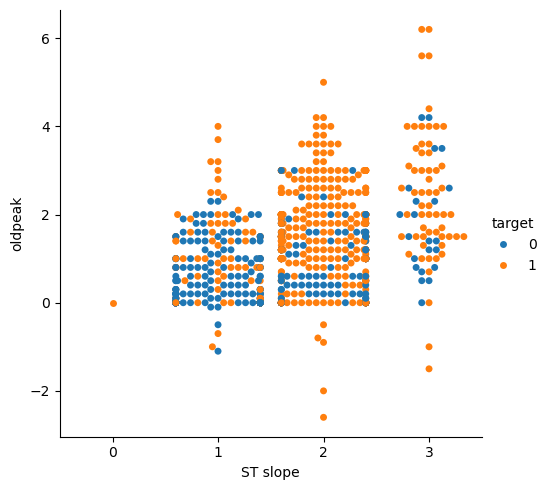

In [39]:
sns.catplot(x="ST slope", y="oldpeak", hue="target", kind="swarm", data=df)

<Axes: xlabel='max heart rate', ylabel='age'>

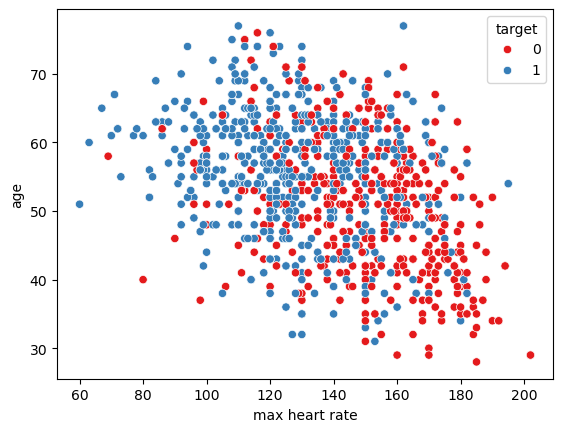

In [40]:
sns.scatterplot(x="max heart rate",y="age",data=df,hue="target",palette='Set1')

In [41]:
#phân tích anova

In [42]:
df.rename(columns={"chest pain type": "chest_pain_type", "fasting blood sugar": "fasting_blood_sugar","exercise angina":"exercise_angina","ST slope":"ST_slope","resting bp s":"resting_bp_s","resting ecg":"resting_ecg","resting bp s":"resting_bp_s","max heart rate":"max_heart_rate"},inplace=True)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('target ~ C(sex)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sex),28.655756,1.0,127.085126,4.487403e-28
Residual,267.650383,1187.0,NaN,NaN


In [44]:
model = ols('target ~ C(chest_pain_type)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(chest_pain_type),83.575963,3.0,155.184873,7.899130e-85
Residual,212.730176,1185.0,NaN,NaN


In [45]:
model = ols('target ~ C(fasting_blood_sugar)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(fasting_blood_sugar),13.980437,1.0,58.778847,3.655465e-14
Residual,282.325702,1187.0,NaN,NaN


In [46]:
model = ols('target ~ C(exercise_angina)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(exercise_angina),68.95546,1.0,360.017092,2.518639e-70
Residual,227.35068,1187.0,NaN,NaN


In [47]:
model = ols('target ~ C(ST_slope)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(ST_slope),96.324837,3.0,190.259341,1.060986e-100
Residual,199.981302,1185.0,NaN,NaN


In [48]:
model = ols('target ~ C(resting_ecg)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(resting_ecg),4.575032,2.0,9.299639,0.000098
Residual,291.731108,1186.0,NaN,NaN


In [49]:
# Phân loại thuộc tính cholesterol dựa vào các khoảng giá trị

In [50]:
for i in df["cholesterol"]:
    if i==0:
        df["cholesterol"].replace(i,"special",inplace=True)
    else:
        if 0<i<200:
            df["cholesterol"].replace(i,"good",inplace=True)
        else:
            if 200<=i<240:
                df["cholesterol"].replace(i,"borderline",inplace=True)
            else:
                df["cholesterol"].replace(i,"high",inplace=True)

C:\Users\danny\AppData\Local\Temp\ipykernel_29952\232498663.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cholesterol"].replace(i,"high",inplace=True)


In [51]:
df= pd.get_dummies(df,columns = ["cholesterol","chest_pain_type","ST_slope"])
df

,age,sex,resting_bp_s,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,target,cholesterol_borderline,...,cholesterol_high,cholesterol_special,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,ST_slope_0,ST_slope_1,ST_slope_2,ST_slope_3
0,40,1,140,0,0,172,0,0.0,0,False,...,True,False,False,True,False,False,False,True,False,False
1,49,0,160,0,0,156,0,1.0,1,False,...,False,False,False,False,True,False,False,False,True,False
2,37,1,130,0,1,98,0,0.0,0,False,...,True,False,False,True,False,False,False,True,False,False
3,48,0,138,0,0,108,1,1.5,1,True,...,False,False,False,False,False,True,False,False,True,False
4,54,1,150,0,0,122,0,0.0,0,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,0,0,132,0,1.2,1,False,...,True,False,True,False,False,False,False,False,True,False
1186,68,1,144,1,0,141,0,3.4,1,False,...,False,False,False,False,False,True,False,False,True,False
1187,57,1,130,0,0,115,1,1.2,1,False,...,False,False,False,False,False,True,False,False,True,False
1188,57,0,130,0,2,174,0,0.0,1,True,...,False,False,False,True,False,False,False,False,True,False


<h1> Áp dụng mô hình thuật toán </h1>

In [53]:
X=df.drop(columns=["target"])
Y=df["target"]

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score

<h2> Chia tập train, test </h2>

In [55]:
#Chia train,test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h2> Random Forest </h2>

In [56]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(criterion='gini')
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [57]:
#Đánh giá mô hình
Y_pre = RF.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       106
           1       0.94      0.95      0.94       132

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



<Axes: >

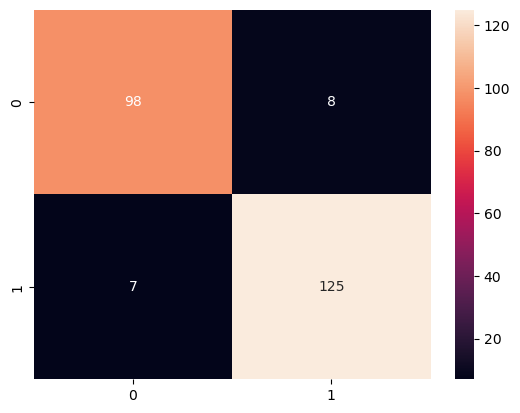

In [58]:
#Ma trận hỗn loạn của RF
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

<h3> Decision Tree </h3>

In [ ]:
#DT gini

In [59]:
#Train decisionTree (Gini)
DecisionTreeGini = DecisionTreeClassifier(criterion="gini")
DecisionTreeGini.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
#Đánh giá mô hình DT: Gini
Y_pre = DecisionTreeGini.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       106
           1       0.88      0.83      0.85       132

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



<Axes: >

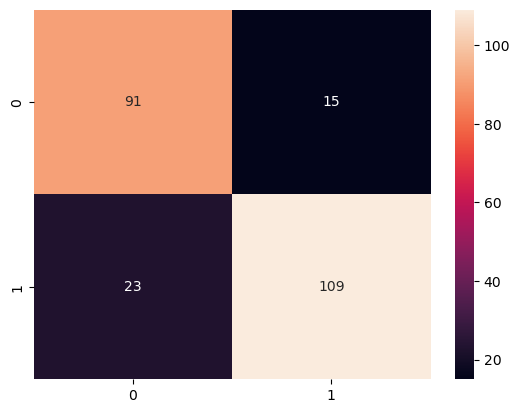

In [61]:
#Ma trận hỗn loạn DT: Gini
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [ ]:
#DT Entrophy

In [62]:
#train mô hình DT: Entrophy
DecisionTreeEntropy = DecisionTreeClassifier(criterion="entropy")
DecisionTreeEntropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
#Đánh giá mô hình
Y_pre = DecisionTreeEntropy.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.90      0.80      0.84       132

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



<Axes: >

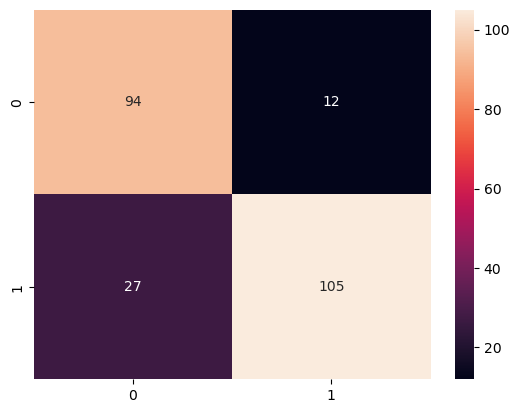

In [64]:
#Ma trận hỗn loạn DT Entrophy
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

<h3> Naive Bayes </h3>

In [65]:
from sklearn.naive_bayes import GaussianNB
#train mô hình Naïve baye
GNB = GaussianNB()
GNB.fit(X_train,Y_train)

GaussianNB()

In [66]:
#Đánh giắ mô hình Navie Bayes
Y_pre = GNB.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       106
           1       0.93      0.67      0.78       132

    accuracy                           0.79       238
   macro avg       0.81      0.80      0.79       238
weighted avg       0.82      0.79      0.79       238



<Axes: >

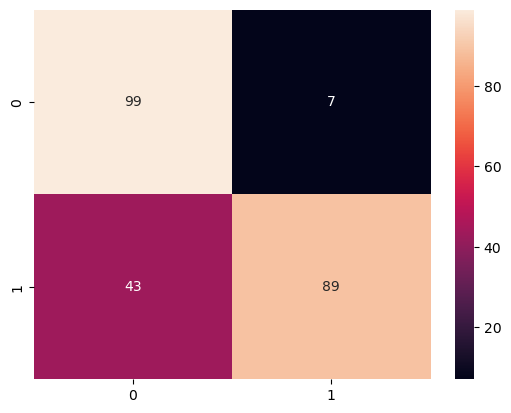

In [67]:
#Ma trận hỗn loạn Naive Bayes
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [68]:
#Áp dụng mô hình để dự đoán bệnh tim

In [ ]:
print('chon mo hinh can chay:(1-4)')
print('1:Random Forest, 2: Naïve bayes,3: Decision Tree gini,4: Decision tree entropy,')
y=int(input())
if (y==1): 
    model=RF
elif (y==2):
    model=GNB
elif (y==3):
    model=DecisionTreeGini
else :
    model=DecisionTreeEntropy
print(' nhap hang can predict trong tap X_test')
print('gia tri hang toi da', len(X_test))
x = int(input())
#_test.reset_index(inplace=True)
X_test.reset_index(drop=True, inplace=True)
x_test=X_test.iloc[[x]]
if model.predict((x_test))==[1]:
    print('ket qua du doan: bi benh')
else:
    print('ket qua du doan: khong bi benh')

chon mo hinh can chay:(1-4)
1:Random Forest, 2: Naïve bayes,3: Decision Tree gini,4: Decision tree entropy,
